# Project Description:Twitter US Airline Sentiment

# Data Description:

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

# Dataset:

- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kagglewebsite.

# Objective:

- To implement the techniques learnt as a part of the course.

# Learning Outcomes:
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Evaluate the Model performance.

In [1]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

     |████████████████████████████████| 327kB 5.3MB/s 
     |████████████████████████████████| 266kB 9.3MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85399 sha256=fe17ffa5385aa6b4369e9b322c09869c6832b8319c9025872b07c9dcd5131b2b
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading data into pandas dataframe
data = pd.read_csv("/content/drive/My Drive/GL_Mentor/Data/Tweets.csv")

In [4]:
data.shape                                               # print shape of data.

(14640, 15)

In [5]:
data.head(3)                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [6]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [7]:
data = data[['text', 'airline_sentiment']]

In [8]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data
#Qn - clean up ?

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [11]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [12]:
data_orig = data.copy()

In [15]:
#Get copy back if reqd
data = data_orig.copy()

# Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

In [13]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [14]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [15]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()
# Qns

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [16]:
#Remove twitter handles
def strip_twitterhandles(text):
    text = re.sub(r'@\S+', '', text)
    return text

data['text'] = data['text'].apply(lambda x: strip_twitterhandles(x))
data.head()

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative


In [17]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data


In [18]:
data.head(2)                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive


In [19]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [20]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()


,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,not today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


In [21]:
data_orig.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [22]:
X = data['text']

y = data.airline_sentiment

In [23]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [24]:
X_train_data.head(2)

5417     suggestions tell customers approximate wait time hold min allow cancel flight online
14211           upset hometown airline stick den flt cancel flightled others get new flt info
Name: text, dtype: object

In [25]:
y_train.value_counts()

negative    6425
neutral     2169
positive    1654
Name: airline_sentiment, dtype: int64

In [26]:
y_test.value_counts()

negative    2753
neutral      930
positive     709
Name: airline_sentiment, dtype: int64

In [27]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)                # Keep only 5000 features as number of features will increase the processing time.
X_train = vectorizer.fit_transform(X_train_data)

X_train = X_train.toarray()                        # Convert the data features to array.
# Count Vectorizer not whole dataset but on training and test dataset seperately

In [28]:
vectorizer.get_feature_names()[:10]

['_exact_',
 'aa',
 'aadv',
 'aadvantage',
 'aano',
 'abc',
 'abilities',
 'ability',
 'able',
 'aboard']

In [29]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7454132050304878


In [30]:
# Predict the result for test data using the model built above.
X_test = vectorizer.transform(X_test_data)
result = forest.predict(X_test)

In [31]:
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.7433970856102003


[[2415  250   88]
 [ 365  478   87]
 [ 195  142  372]]


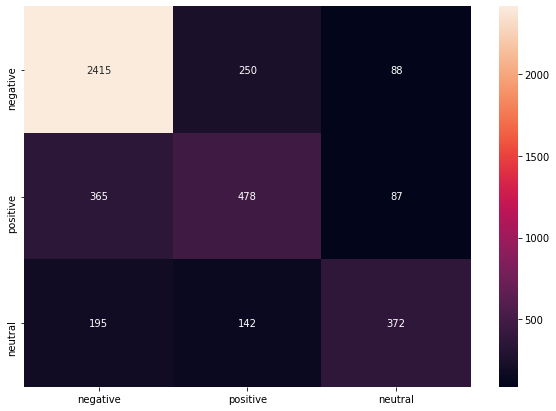

In [32]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','positive', 'neutral']],
                  columns = [i for i in ['negative','positive', 'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


In [33]:
# Make Predictions
forest.predict(vectorizer.transform(['This airline is awesome']))

array(['positive'], dtype=object)

In [34]:
forest.predict(vectorizer.transform(['This airline is worse']))

array(['negative'], dtype=object)

In [35]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_train = vectorizer_tfidf.fit_transform(X_train_data)

X_train = X_train.toarray()  

In [36]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7509738948170732


In [37]:
result = forest.predict(X_test)
print('Accuracy on Test Data Set',sum(result == y_test) / len(y_test))

Accuracy on Test Data Set 0.7042349726775956


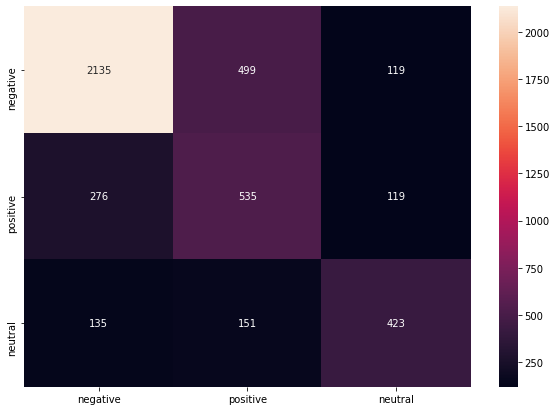

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative','positive',  'neutral']],
                  columns = [i for i in ['negative','positive',  'neutral']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summary:

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- One more way to increase accuracy is to use different variations of Pre-processing techniques such as emojify library for handling emojis

In [39]:
# Using Deep Neural Networks
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#X_train_data, X_test_data, y_train, y_test

In [40]:
length = 0
for i in range(0,len(X_train_data)):
  length = length + len(X_train_data.iloc[i])
print('Avg Length of Sequences',length/X_train_data.shape[0])


Avg Length of Sequences 55.655152224824356


In [41]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [42]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
embedding_dim = 16
max_length = 75
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = 50000,oov_token=oov_tok)  # Keras Tokenizer
tokenizer.fit_on_texts(X_train_data)

vocab_size = len(tokenizer.word_index) + 1

word_index = tokenizer.word_index
X_train_tokenize = tokenizer.texts_to_sequences(X_train_data)
padded = pad_sequences(X_train_tokenize,maxlen=max_length,truncating=trunc_type, padding='post')

X_test_tokenize = tokenizer.texts_to_sequences(X_test_data)
testing_padded = pad_sequences(X_test_tokenize,maxlen=max_length,truncating=trunc_type, padding='post')

In [43]:
#Vocab size
len(tokenizer.word_index) + 1

9096

In [44]:
#Padded sequence used as input to Keras Model
print(X_train_data[2])
print(X_train_tokenize[2])
print(padded[2])

not today must mean need take another trip
[3827, 803, 2739, 2740, 2741, 3828, 804, 805, 6, 3829]
[3827  803 2739 2740 2741 3828  804  805    6 3829    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]


In [45]:
for word in ['good', 'nice', 'happy', 'sad', 'ok','super']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

good: 74
nice: 187
happy: 287
sad: 578
ok: 250
super: 519


In [46]:
#First Model - Word Embedding Vector with Dense Layers
import tensorflow as tf

model = tf.keras.Sequential()
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(16,activation='relu'),
                             tf.keras.layers.Dense(3,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 75, 16)            145536    
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 145,859
Trainable params: 145,859
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
321/321 [==============================] - 2s 5ms/step - loss: 0.9652 - accuracy: 0.5971 - val_loss: 0.7091 - val_accuracy: 0.6910
Epoch 2/10
321/321 [==============================] - 1s 4ms/step - loss: 0.6459 - accuracy: 0.7393 - val_loss: 0.5969 - val_accuracy: 0.7628
Epoch 3/10
321/321 [==============================] - 1s 4ms/step - loss: 0.5109 - accuracy: 0.8046 - val_loss: 0.5692 - val_accuracy: 0.7739
Epoch 4/10
321/321 [==============================] - 1s 4ms/step - loss: 0.4138 - accuracy: 0.8443 - val_loss: 0.5658 - val_accuracy: 0.7689
Epoch 5/10
321/321 [==============================] - 1s 4ms/step - loss: 0.3670 - accuracy: 0.8609 - val_loss: 0.5762 - val_accuracy: 0.7691
Epoch 6/10
321/321 [==============================] - 1s 4ms/step - loss: 0.3077 - accuracy: 0.8897 - val_loss: 0.5953 - val_accuracy: 0.7682
Epoch 7/10
321/321 [==============================] - 1s 4ms/step - loss: 0.2541 - accuracy: 0.9089 - val_loss: 0.6188 - val_accuracy: 0.7666
Epoch 

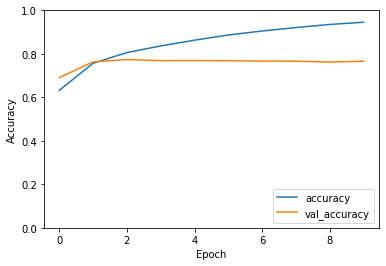

In [47]:
num_epochs = 10
history = model.fit(padded,y_train,epochs = num_epochs, validation_data=(testing_padded,y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

In [48]:
# Each word in Vocab with embedding vector
e =model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(9096, 16)


In [49]:
#Vector of 16 for each word
weights[0]

array([-0.1680265 , -0.19553643, -0.13550632, -0.12544985, -0.14022386,
       -0.15773582, -0.13272202,  0.44994736, -0.12481587, -0.2912676 ,
       -0.16697723, -0.11466751, -0.13948657,  0.2980558 , -0.12816018,
       -0.1355757 ], dtype=float32)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 75, 16)            145536    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 145,859
Trainable params: 145,859
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
321/321 [==============================] - 2s 4ms/step - loss: 0.9660 - accuracy: 0.6359 - val_loss: 0.7

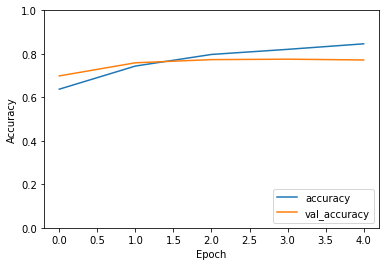

In [50]:
#Second Model with Regularization
import tensorflow as tf

model = tf.keras.Sequential()
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(16,activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 5
history = model.fit(padded,y_train,epochs = num_epochs, validation_data=(testing_padded,y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

In [51]:
# Use predefined embedding - Glove Embedding

In [52]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [53]:
embedding_dim = 100
filepath = "/content/drive/My Drive/GL_Mentor/Data/glove.6B.300d.txt"
embedding_matrix = create_embedding_matrix(filepath,tokenizer.word_index, embedding_dim)

In [67]:
len(word_index)

9095

In [54]:
embedding_matrix.shape

(9096, 100)

In [55]:
vocab_size

9096

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 75, 100)           909600    
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 12)                1212      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 39        
Total params: 910,851
Trainable params: 910,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
321/321 [==============================] - 4s 12ms/step - loss: 0.8505 - accuracy: 0.6484 - val_loss: 0.6887 - val_accuracy: 0.7033
Epoch 2/10
321/321 [==============================] - 4s 12ms/step - loss: 0.6151 - accuracy: 0.7459 - 

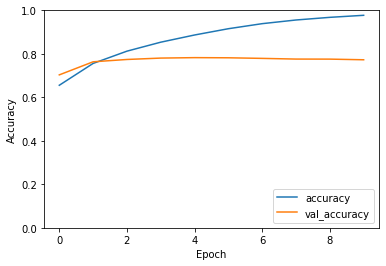

In [56]:
#Model 3 - Keras model with pretrained embedding vectors
#The glove file can be obtained at https://github.com/stanfordnlp/GloVe
model_glove = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],input_length = max_length),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(3,activation='softmax')
])
model_glove.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_glove.summary()

num_epochs = 10
history_glove = model_glove.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_glove.history['accuracy'], label='accuracy')
plt.plot(history_glove.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');

In [57]:
#Word vectors in current Vocab not in Glove Pretrained vector list
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / vocab_size)

0.6730430958663148


In [58]:
## Word2Vec Method
from gensim.models import Word2Vec

In [59]:
lst = X_train_data.tolist()

In [60]:
#Convert to list of lists
for l in lst[:1]:
  res = []
  for el in lst:
    sub = el.split()
    res.append(sub)

In [61]:
lst[:1]

['suggestions tell customers approximate wait time hold min allow cancel flight online']

In [62]:
res[:1]

[['suggestions',
  'tell',
  'customers',
  'approximate',
  'wait',
  'time',
  'hold',
  'min',
  'allow',
  'cancel',
  'flight',
  'online']]

In [63]:
model = Word2Vec(res, min_count=1,size= 50,workers=3, window =3, sg = 1)
#Size - Embedding Dimension
#Window - Target word vs Context word
#min_count - Minimum count of words to consider
#Algo Bag of Words vs Single Grams

In [71]:
word2vec_vocab= list(model.wv.vocab)

In [74]:
type(word2vec_vocab)

list

In [65]:
embedding_matrix.shape

(9096, 100)

In [69]:
model['poor']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.34949496,  0.47700655, -0.1585599 ,  0.25789553,  0.28194764,
        0.09835506,  0.04675354,  0.08495025,  0.21892431,  0.49081215,
        0.7790111 , -0.06233158,  0.1558735 , -0.09570195, -0.05118703,
        0.08048796,  0.27663434, -0.30307055, -0.16933225,  0.04132691,
       -0.22093713,  0.14610052, -0.3052851 , -0.1940166 , -0.57635134,
        0.21557567, -0.48309994,  0.32935327,  0.16319126,  0.12531023,
       -0.14566788,  0.18034494,  0.33121172,  0.1466751 ,  0.01214683,
        0.19886461, -0.07777119,  0.04524614,  0.3245976 ,  0.24421296,
       -0.6650194 ,  0.14274292,  0.5452193 , -0.15650703,  0.7320916 ,
        0.0909052 ,  0.09486398,  0.3597153 ,  0.23533192,  0.29817235],
      dtype=float32)

In [70]:
model.most_similar('poor')[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('suck', 0.9939659833908081),
 ('terrible', 0.993756115436554),
 ('disappoint', 0.9932999014854431),
 ('horrible', 0.991725504398346),
 ('lack', 0.991016685962677)]

In [76]:
## Model using Pretrained Embedding Weights - Word2Vec
def create_embedding_matrix(model, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word in word2vec_vocab:
        word, *vector = word,model[word]
        if word in word_index:
            idx = word_index[word] 
            embedding_matrix[idx] = np.array(
            vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [77]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(model,tokenizer.word_index, embedding_dim)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [81]:
embedding_matrix.shape

(9096, 50)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 75, 50)            454800    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                612       
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 39        
Total params: 455,451
Trainable params: 455,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
321/321 [==============================] - 3s 8ms/step - loss: 0.9257 - accuracy: 0.5575 - val_loss: 0.7253 - val_accuracy: 0.6767
Epoch 2/10
321/321 [==============================] - 2s 7ms/step - loss: 0.6731 - accuracy: 0.7096 - va

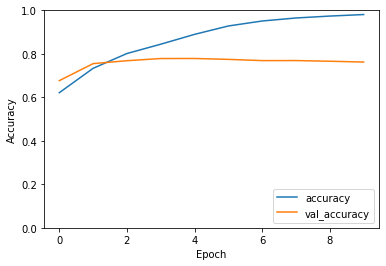

In [78]:
#Model 3 - Keras model with pretrained embedding vectors from word2vec
model_word2vec = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],input_length = max_length),
                             tf.keras.layers.GlobalMaxPool1D(),
                             tf.keras.layers.Dense(12,activation='relu'),
                             tf.keras.layers.Dense(3,activation='softmax')
])
model_word2vec.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_word2vec.summary()

num_epochs = 10
history_word2vec = model_word2vec.fit(padded,y_train,epochs = num_epochs,validation_data=(testing_padded,y_test))

plt.plot(history_word2vec.history['accuracy'], label='accuracy')
plt.plot(history_word2vec.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right');
